# Summarize Data 

__Purpose:__ The purpose of this lecture is to learn how to summarize data

__At the end of this lecture you will be able to:__
> 1. Summarize data using measures of Central Tendency and Variation 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import math 
import random
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1. Summarizing Data and Distributions:

__Overview:__
- It is possible to summarize data directly, but we typically create a Probability Distribution for the univariate (single variable) data that we are interested in exploring 
- Recall the definition of a Probability Distribution (Probability Distributions describes the probabilities of occurrences of possible outcomes) 
- We can use one of two types of summaries to characterize the data and distributions: 
> 1. __[Central Tendency](https://en.wikipedia.org/wiki/Central_tendency):__ Central Tendency is the central value of a Probability Distribution and can be measured in many different ways. The most common measures of Central Tendency include the following:
>> a. __Arithmetic Mean:__  The Arithmetic Mean refers to the arithmetic average of a group values which is equal to dividing the total sum of all the values by the number of values <br> 
>> b. __Median:__ The Median refers to the middle value and is found by ordering the data and choosing the value in the middle (or the average of the two middle values if the data has an even number of values) <br>
>> c. __Mode:__ The mode refers to the value that occurs most often in the data and is found first by calculating the frequency of each value in the data abd then finding the value that has the highest frequency 
> 2. __[Variability/Dispersion](https://en.wikipedia.org/wiki/Statistical_dispersion):__ Dispersion refers to the variability or spread of the distribution for each data point to the center of the distribution. The most common measures of Dispersion include the following: 
>> a. __Variance:__ The Variance is the average of the squared differences of each value and the mean of the data/distribution <br>
>> b. __Standard Deviation:__ Standard Deviation is the square root of the Variance 

__Helpful Points:__ 
1. Based on the type of data, different measures of Central Tendency are used:
>> a. __Nominal Data:__ The Central Tendency in Nominal Data is the Mode <br>
>> b. __Ordinal Data:__ The Central Tendency in Ordinal Data is the Median <br>
>> c. __Interval Data:__ The Central Tendency in Interval Data is the Mean<br>
>> d. __Ratio Data:__ The Central Tendency in Ratio Data is the Geometric Mean 

__Practice:__ Examples of Summarizing Data in Python 

In [3]:
# read in data to analyze 
nba_df = pd.read_csv("NBA_GameLog_2010_2017.csv")
tor_2016_2017 = nba_df.loc[(nba_df.loc[:, "Season"] == 2017) & (nba_df.loc[:, "Team"] == "TOR"), ]

### Part 1 (Central Tendency):

### Example 1.1 (Mean of Data):

In [5]:
tor_2016_2017.loc[:, ["Tm.Pts", "Opp.Pts", 'Tm.FGM', 'Tm.FGA', 'Tm.FG_Perc', 'Tm.3PM', 'Tm.3PA',
       'Tm.3P_Perc', 'Tm.FTM', 'Tm.FTA', 'Tm.FT_Perc', 'Tm.ORB', 'Tm.TRB',
       'Tm.AST', 'Tm.STL', 'Tm.BLK', 'Tm.TOV', 'Tm.PF', 'Home.Attendance']].mean(axis=0)

Tm.Pts               105.750000
Opp.Pts              102.619565
Tm.FGM                38.739130
Tm.FGA                83.836957
Tm.FG_Perc             0.462924
Tm.3PM                 8.728261
Tm.3PA                24.250000
Tm.3P_Perc             0.359913
Tm.FTM                19.543478
Tm.FTA                24.489130
Tm.FT_Perc             0.798717
Tm.ORB                10.206522
Tm.TRB                42.815217
Tm.AST                18.619565
Tm.STL                 8.173913
Tm.BLK                 4.826087
Tm.TOV                11.836957
Tm.PF                 20.836957
Home.Attendance    18982.934783
dtype: float64

### Example 1.2 (Median of Data):

In [6]:
# remove scientific notation 
np.set_printoptions(suppress=True)

In [7]:
np.median(tor_2016_2017.loc[:, ["Tm.Pts", "Opp.Pts", 'Tm.FGM', 'Tm.FGA', 'Tm.FG_Perc', 'Tm.3PM', 'Tm.3PA',
       'Tm.3P_Perc', 'Tm.FTM', 'Tm.FTA', 'Tm.FT_Perc', 'Tm.ORB', 'Tm.TRB',
       'Tm.AST', 'Tm.STL', 'Tm.BLK', 'Tm.TOV', 'Tm.PF', 'Home.Attendance']], axis=0)

array([  105.5   ,   102.5   ,    39.    ,    84.    ,     0.4655,
           9.    ,    24.5   ,     0.356 ,    19.    ,    24.    ,
           0.806 ,    10.    ,    43.    ,    19.    ,     8.    ,
           5.    ,    12.    ,    21.    , 19800.    ])

### Example 1.3 (Mode of Data):

In [8]:
stats.mode(tor_2016_2017.loc[:, ["Tm.Pts", "Opp.Pts", 'Tm.FGM', 'Tm.FGA', 'Tm.FG_Perc', 'Tm.3PM', 'Tm.3PA',
       'Tm.3P_Perc', 'Tm.FTM', 'Tm.FTA', 'Tm.FT_Perc', 'Tm.ORB', 'Tm.TRB',
       'Tm.AST', 'Tm.STL', 'Tm.BLK', 'Tm.TOV', 'Tm.PF', 'Home.Attendance']])

ModeResult(mode=array([[   94.   ,   102.   ,    37.   ,    87.   ,     0.457,    10.   ,
           25.   ,     0.25 ,    17.   ,    23.   ,     0.778,     8.   ,
           43.   ,    19.   ,     7.   ,     5.   ,    11.   ,    21.   ,
        19800.   ]]), count=array([[ 6,  7,  9,  8,  4, 17, 10,  5, 11,  7,  4, 15,  8, 11, 17, 21,
        15, 13, 40]]))

### Example 1.4 (Mean of Distribution)

First, we need to create a Probability Distribution for the variable "Team Points". This can be done manually by finding the relative frequency of each unique value in the variable "Team Points". It can also be done programmatically using the `seaborn` Package. 

In [9]:
team_points = tor_2016_2017.loc[:, "Tm.Pts"].value_counts().index
team_points

Int64Index([113,  94, 118, 122, 105, 101,  96, 109, 106, 103, 102, 116,  99,
            112,  91, 111,  92,  90,  89,  87, 115, 114, 121, 123, 104, 117,
            119, 120, 128, 110, 108, 107, 131, 100,  98,  95,  83,  82,  78,
             77, 132, 124],
           dtype='int64')

In [10]:
team_points_prob = tor_2016_2017.loc[:, "Tm.Pts"].value_counts() / tor_2016_2017.loc[:, "Tm.Pts"].value_counts().sum()
team_points_prob.head(5)

113    0.065217
94     0.065217
118    0.043478
122    0.043478
105    0.043478
Name: Tm.Pts, dtype: float64

<BarContainer object of 42 artists>

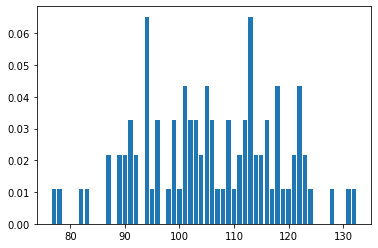

In [11]:
# manual probability distribution (prob. mass function)
plt.bar(team_points, team_points_prob)

The bar chart depicts a probablity mass function (PMF). PMF is the probability distribution of a discrete random variable, and provides the possible values and their associated probabilities. 

So the PMF plotted above is a probability measure that gives us probabilities of the possible values for a discrete random variable, which in our case is team_points.


**Formal definition**:
Let X be a discrete random variable with range Rx={x1,x2,x3,...} (finite or countably infinite). The function

<center>

Px(xk)=P(X=xk), for k=1,2,3,...,

</center>

is called the probability mass function (PMF) of X.

In [12]:
team_points_prob.sum()

1.0

Note that the sum of the probabilities equals to 1!

Density plots are another useful method to study data distributions of one or more numeric variables. 

Kernel density estimatation plot is a non-parametric method of estimating the probability density function (PDF) of a continuous random variable. It is non-parametric because it does not assume any underlying distribution for the variable. At every data point, a kernel function is created with the data point at its centre – this ensures that the kernel is symmetric about that specific data point.

Intuitively, density plots can be thought of a smoothed version of the histogram.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


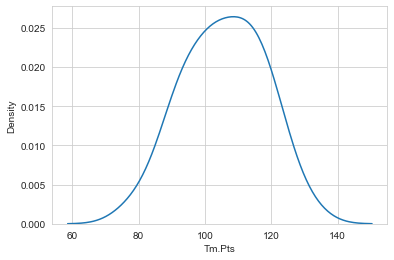

In [16]:
# kernel density plot 
sns.set_style('whitegrid');
sns.kdeplot(tor_2016_2017.loc[:, "Tm.Pts"], bw=0.5);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


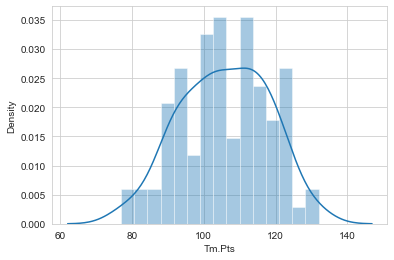

In [19]:
sns.distplot(tor_2016_2017.loc[:, "Tm.Pts"],kde=True,bins=15);

Recall the formula for the Expected Value for a Discrete Random Variable: The sum of the product of the possible values of the Random Variable and the probability of each value occurring. We can use the dot product function for this calculation. See below:

In [ ]:
distr_mean = np.dot(team_points, team_points_prob)
distr_mean

### Part 2 (Dispersion):

### Example 2.1 (Variance of Data):

$\sigma$ = $\sqrt{\sigma^2}$

In [ ]:
tor_2016_2017.loc[:, ["Tm.Pts", "Opp.Pts", 'Tm.FGM', 'Tm.FGA', 'Tm.FG_Perc', 'Tm.3PM', 'Tm.3PA',
       'Tm.3P_Perc', 'Tm.FTM', 'Tm.FTA', 'Tm.FT_Perc', 'Tm.ORB', 'Tm.TRB',
       'Tm.AST', 'Tm.STL', 'Tm.BLK', 'Tm.TOV', 'Tm.PF', 'Home.Attendance']].var(axis=0)

### Example 2.2 (Standard Deviation of Data):

In [ ]:
tor_2016_2017.loc[:, ["Tm.Pts", "Opp.Pts", 'Tm.FGM', 'Tm.FGA', 'Tm.FG_Perc', 'Tm.3PM', 'Tm.3PA',
       'Tm.3P_Perc', 'Tm.FTM', 'Tm.FTA', 'Tm.FT_Perc', 'Tm.ORB', 'Tm.TRB',
       'Tm.AST', 'Tm.STL', 'Tm.BLK', 'Tm.TOV', 'Tm.PF', 'Home.Attendance']].std(axis=0)

### Example 2.3 (Variance of Distribution):

In [ ]:
distr_var = np.dot((team_points - distr_mean)**2, team_points_prob)
distr_var

### 1.2. The Standard Score or z-score

Is a variable that measures the deviation from the mean in units of the standard deviation.  It is a dimensionless quantity, and is given by:

<center>
$z=\frac{X-\bar{X}}{\sigma}$
</center>

where:

X is a single raw data value

$\bar X$ is the population mean

σ is the population standard deviation

In [1]:
# Create an array of values
data = np.array([6, 7, 7, 12, 13, 13, 15, 16, 19, 22])

NameError: name 'np' is not defined

In [2]:
#Use the zscore function on the data
stats.zscore(data)

NameError: name 'stats' is not defined

Each z-score tells us how many standard deviations away an individual value is from the mean. For example:

The first value of “6” in the array is 1.394 standard deviations **below** the mean.

The fifth value of “13” in the array is 0 standard deviations away from the mean, i.e. it is **equal** to the mean.

The last value of “22” in the array is 1.793 standard deviations **above** the mean.

In [ ]:
# Create a dataframe 
data_frame = pd.DataFrame(np.random.randint(0, 10, size=(5, 3)), columns=['A', 'B', 'C'])
data_frame

In [ ]:
#Use the apply function to calculate z-scores for columns, 'A','B' and 'C'
data_frame.apply(stats.zscore)

Try to observe and note how the z-scores for each individual value are shown relative to the column they’re in.